In [1]:
#Exercise 1
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
           'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
           'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
           'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}
df = pd.DataFrame(dataset,columns=['Taste','Temperature','Texture','Eat'])
display(df)

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No
2,Spicy,Hot,Hard,Yes
3,Spicy,Cold,Hard,No
4,Spicy,Hot,Hard,Yes
5,Sweet,Cold,Soft,Yes
6,Salty,Cold,Soft,No
7,Sweet,Hot,Soft,Yes
8,Spicy,Cold,Soft,Yes
9,Salty,Hot,Hard,Yes


In [2]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

entropy_node = 0 #Initialize Entropy
values = df.Eat.unique() #Unique objects - 'Yes','No'
for value in values:
    fraction = df.Eat.value_counts()[value]/len(df.Eat)
    entropy_node += -fraction*np.log2(fraction)
    display(entropy_node)

0.5287712379549449

0.9709505944546686

In [3]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

attribute = 'Taste'
target_variables = df.Eat.unique() #This gives all 'Yes' and 'No'
variables = df[attribute].unique()    #This gives different features
                                     # in that attribute(like 'Sweet')
entropy_attribute = 0
for variable in variables:
    entropy_each_feature = 0
    for target_variable in target_variables:
        num = len(df[attribute] [df[attribute] ==variable][df.Eat ==target_variable]) # numerator
        den = len(df[attribute][df[attribute]==variable])  #denominator
        fraction = num/(den+eps) #pi
        entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Sweet'
    fraction2 = den/len(df)
    entropy_attribute += -fraction2*entropy_each_feature #Sums up all the entropy ETaste
display(abs(entropy_attribute))

0.7609640474436806

In [4]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011
def find_entropy(df):
    Class = df.keys()[-1] #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1] #To make the code generic, changing target variable class name
    target_variables = df[Class].unique() #this gives all 'Yes' and 'No'
    variables = df[attribute].unique() #This gives different features in that attribute
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        # Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]

def get_subtable(df, node,value):
    return  df[df[node] == value].reset_index(drop=True)

def buildTree(df,tree=None):
    Class = df.keys()[-1] # To make the code generic, changing target variable
                          # class name
        
    # Here we build our decision tree
    
    # Get attribute with maximum informtion gain
    node = find_winner(df)
    
    # Get distinct value of that attribute e.g Salary is node and Low,Me
    #and high are values
    attValue = np.unique(df[node])
    
    # Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}
        
    #We make loop to construct a tree by  calling this function recursively.
    #in this we check if the subset is pure and stops if it is pure.
    
    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Eat'],return_counts=True)
        
        if len(counts)==1: #checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) # calling the function recursively
            
    return tree

In [5]:
tree = buildTree(df)

In [6]:
import pprint
pprint.pprint(tree)

{'Taste': {'Salty': {'Texture': {'Hard': 'Yes', 'Soft': 'No'}},
           'Spicy': {'Temperature': {'Cold': {'Texture': {'Hard': 'No',
                                                          'Soft': 'Yes'}},
                                     'Hot': {'Texture': {'Hard': 'Yes',
                                                         'Soft': 'No'}}}},
           'Sweet': 'Yes'}}


In [7]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011
def predict(inst,tree):
    
    
    for nodes in tree.keys():
        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
        
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;
            
    return prediction

inst = df.iloc[6]

display(inst)

prediction = predict(inst, tree)
prediction

data = {'Taste':'Salty', 'Temperature':'Cold', 'Texture':'Hard'}

inst = pd.Series(data)

prediction = predict(inst, tree)
display(prediction)

Taste          Salty
Temperature     Cold
Texture         Soft
Eat               No
Name: 6, dtype: object

'Yes'

In [8]:
#Exercise 2
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load data and store it into pandas DataFrame ojects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

In [9]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

# Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 10)

In [10]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

# Defining and fitting a DecisionTreeClasifier instance
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

# Show the classification performance
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = tree.predict(X_test)
print("Precision score: {0:.2%}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall score: {0:.2%}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 score: {0:.2%}".format(f1_score(y_test, y_pred, average='macro')))

Precision score: 92.59%
Recall score: 94.87%
F1 score: 93.06%


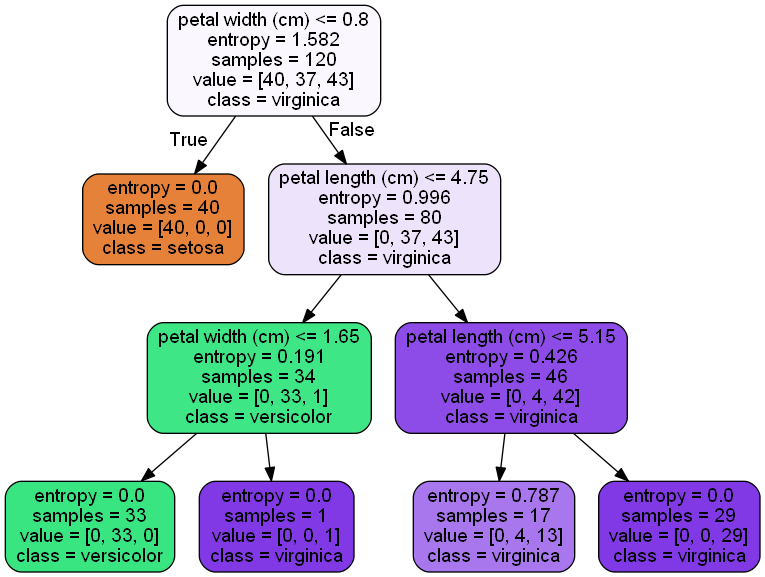

In [12]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

# Visualize Decision Tree
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Create dot file named iris_tree.dot
export_graphviz(
            tree,
            out_file = "iris_tree.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

(graph,) = pydot.graph_from_dot_file('iris_tree.dot')
Image(graph.create_png())

In [13]:
#Exercise 3
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [14]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

data = pd.read_csv('./loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


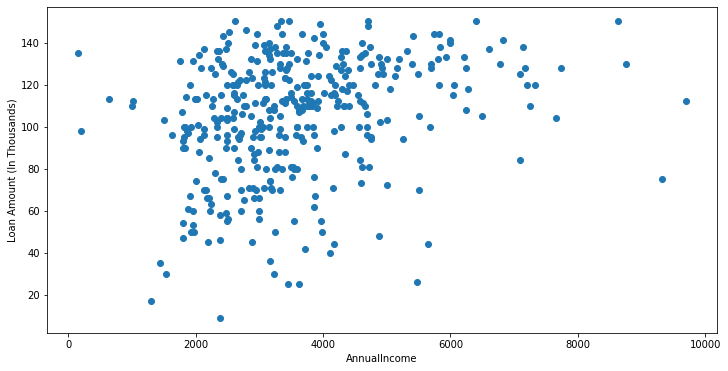

In [15]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

X = data[["ApplicantIncome","LoanAmount"]]

plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

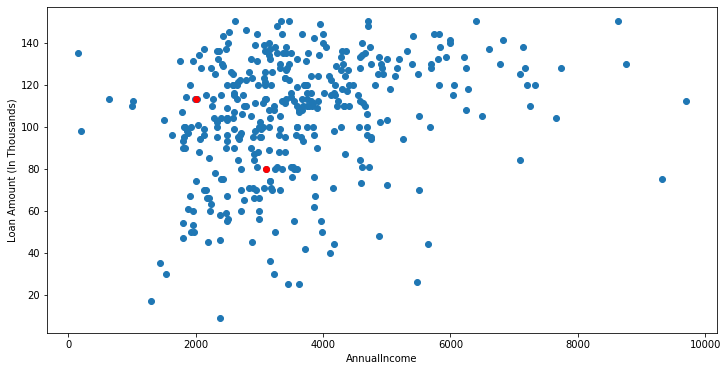

In [16]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#number of clusters
K=2

Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [17]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

diff = 1
j = 0

while(diff != 0):
    XD = X
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + \
        (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]

C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


616.5392646434027
492.6583900783902
365.82469171500003
262.67365406567103
202.3939525521446
123.80701540604326
15.695981556435925
0.0


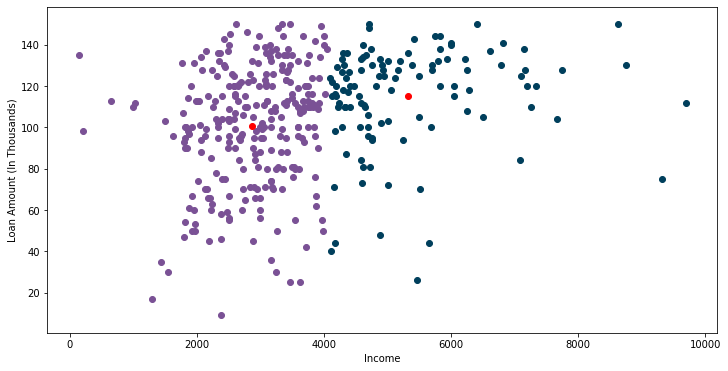

In [18]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

color = ['#003f5c', '#7a5195']
plt.figure(figsize = (12, 6))

for k in range(K):
    data = X[X["Cluster"] == k + 1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c = color[k])

plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c = 'red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [19]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

#reading the data and looking at the first five rows of the data
data = pd.read_csv("loan_dataset.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [20]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

sltd_data = data[["ApplicantIncome", "LoanAmount"]]
sltd_data.describe()

,ApplicantIncome,LoanAmount
count,381.000000,381.000000
mean,3579.845144,104.986877
std,1419.813818,28.358464
min,150.000000,9.000000
25%,2600.000000,90.000000
50%,3333.000000,110.000000
75%,4288.000000,127.000000
max,9703.000000,150.000000


In [21]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,3.810000e+02,3.810000e+02
mean,9.994921e-17,-9.179009e-17
std,1.001315e+00,1.001315e+00
min,-2.418877e+00,-3.389221e+00
25%,-6.910297e-01,-5.291748e-01
50%,-1.740860e-01,1.770094e-01
75%,4.994218e-01,7.772660e-01
max,4.318317e+00,1.589378e+00


(-4, 5)

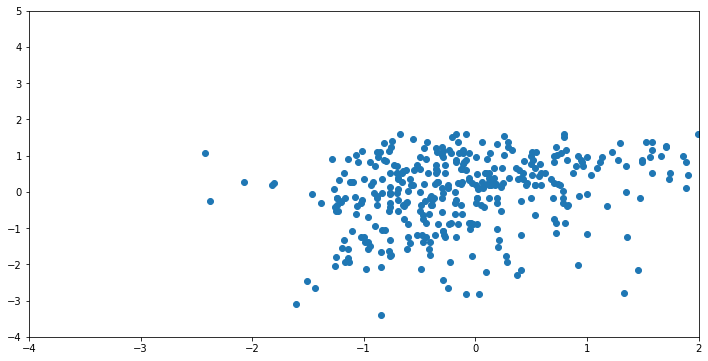

In [22]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

plt.figure(figsize = (12, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])
plt.xlim(-4, 2)
plt.ylim(-4, 5)

In [23]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters = 2, init = 'random')

#fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

In [24]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#inertia on the fitted data
kmeans.inertia_

453.5681659194928

Text(0, 0.5, 'Inertia')

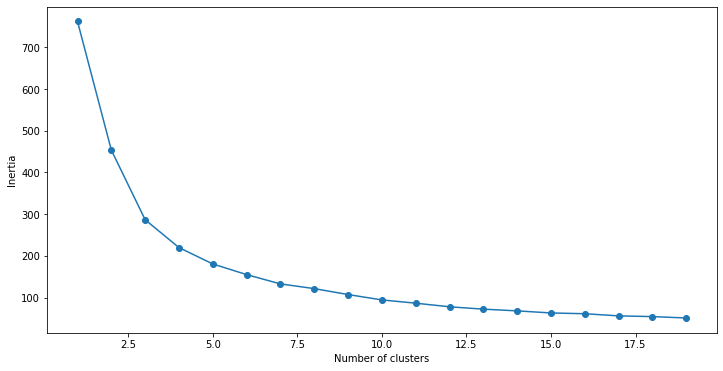

In [25]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#fitting multiple k-means algorithm and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

#converting the results into a dataframe and ploting
frame = pd.DataFrame({'Cluster':range(1, 20), 'SSE':SSE})
plt.figure(figsize = (12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [26]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

# k means using 3 clusters and random initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init = 'random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    200
1     97
0     84
Name: cluster, dtype: int64

(-4, 5)

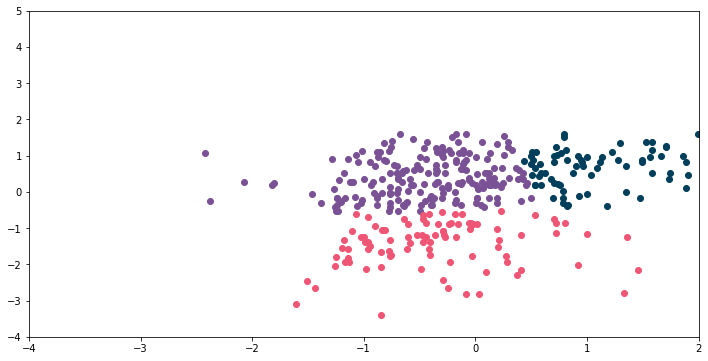

In [27]:
#Praktikum 2
#Nama : Triska Paskah Uli Pangaribuan
#NIM : 11S17011

#inertia on the fitted data
kmeans.inertia_
#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

#create scatter plot
plt.figure(figsize = (12, 6))
plt.scatter(data_scaled[y_km == 0,0], data_scaled[y_km == 0,1], c = '#003f5c')
plt.scatter(data_scaled[y_km == 1,0], data_scaled[y_km == 1,1], c = '#7a5195')
plt.scatter(data_scaled[y_km == 2,0], data_scaled[y_km == 2,1], c = '#ef5675')
plt.xlim(-4, 2)
plt.ylim(-4, 5)